In [1]:
import torch
import torch.nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
### building a model data

weight = 0.7
bias = 0.3

hello = torch.arange(start=0, end = 1 , step = 0.002).unsqueeze(dim=1)
bro = weight*hello+ bias

hello[:10],bro[:10]

(tensor([[0.0000],
         [0.0020],
         [0.0040],
         [0.0060],
         [0.0080],
         [0.0100],
         [0.0120],
         [0.0140],
         [0.0160],
         [0.0180]]),
 tensor([[0.3000],
         [0.3014],
         [0.3028],
         [0.3042],
         [0.3056],
         [0.3070],
         [0.3084],
         [0.3098],
         [0.3112],
         [0.3126]]))

In [19]:
len (hello), len (bro)

(500, 500)

### here i would be focusing on splitting the data into train and test sets mate

In [4]:
 ## there are three types of sets
 ## 1. training set - 60 - 80%
 ## 2. validation set - not all models have it but mostly 10 %
 ## 3. test set - 10 - 30%

In [20]:
train_split = int(0.8*len(hello))
hello_train, bro_train = hello[:train_split],bro[:train_split]
hello_test, bro_test = hello[train_split:],bro[train_split:]

len(hello_test),len(hello_train),len(bro_test),len(bro_train)

(100, 400, 100, 400)

alright lets use matplotlib to make it more amusing as a firework less goo

In [21]:
def graphy(train_data = hello_train,
           train_label= bro_train,
           test_data = hello_test,
           test_label= bro_test,
           predictions = None):

    plt.figure(figsize=(6,9))

    plt.scatter(train_data,train_label,c="r",s=5,label = "training data")
    plt.scatter(test_data,test_label,c="g",s=5,label="testing data")

    if predictions is not None:
      plt.scatter(test_data,predictions,c="b",s=10,label="predictions")


    plt.legend(prop={"size":14})





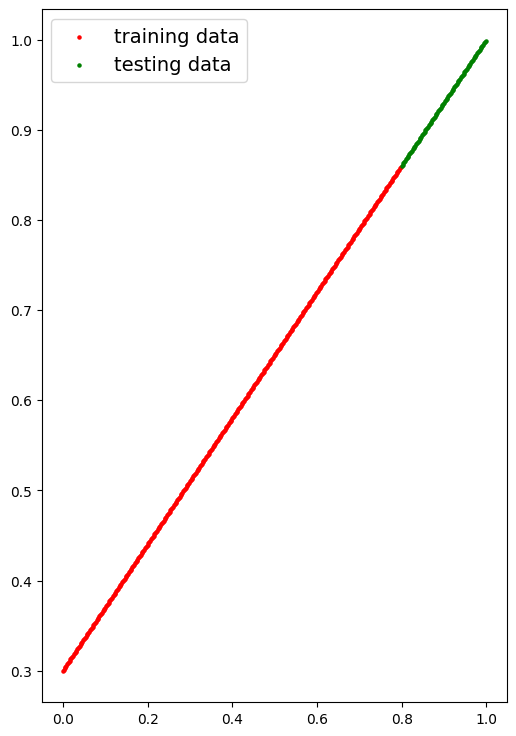

In [22]:
graphy()

###Building model to fit data in the red line

In [23]:
from torch import nn


class linearregression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

  def forward(self,x:torch.Tensor) -> torch.tensor:
    return self.weight * hello + self.bias

so we have few building blocks of pytorch that u have to understand

1. torch.nn(neural network)
2. torch.parameter
3. torch.Module
4. torch.optim = optimiser
5. def forward() - > this means what is gonna happen to stuff in computation

In [24]:
torch.manual_seed(69)

model_bro = linearregression()

list(model_bro.parameters())

[Parameter containing:
 tensor([-0.5259], requires_grad=True),
 Parameter containing:
 tensor([-2.6043], requires_grad=True)]

In [25]:
model_bro.state_dict()

OrderedDict([('weight', tensor([-0.5259])), ('bias', tensor([-2.6043]))])

In [11]:
### alright so untill here we made some checking as to how the data models is being done


lets do predictions

In [26]:
with torch.inference_mode():
  y_preds = model_bro(hello_test)


y_preds

tensor([[-2.6043],
        [-2.6053],
        [-2.6064],
        [-2.6074],
        [-2.6085],
        [-2.6095],
        [-2.6106],
        [-2.6116],
        [-2.6127],
        [-2.6137],
        [-2.6148],
        [-2.6158],
        [-2.6169],
        [-2.6179],
        [-2.6190],
        [-2.6200],
        [-2.6211],
        [-2.6221],
        [-2.6232],
        [-2.6243],
        [-2.6253],
        [-2.6264],
        [-2.6274],
        [-2.6285],
        [-2.6295],
        [-2.6306],
        [-2.6316],
        [-2.6327],
        [-2.6337],
        [-2.6348],
        [-2.6358],
        [-2.6369],
        [-2.6379],
        [-2.6390],
        [-2.6400],
        [-2.6411],
        [-2.6421],
        [-2.6432],
        [-2.6442],
        [-2.6453],
        [-2.6463],
        [-2.6474],
        [-2.6484],
        [-2.6495],
        [-2.6505],
        [-2.6516],
        [-2.6527],
        [-2.6537],
        [-2.6548],
        [-2.6558],
        [-2.6569],
        [-2.6579],
        [-2.

Training the ml model apparently sizes are same but not same

In [14]:
list (model_bro.parameters())

[Parameter containing:
 tensor([-0.5259], requires_grad=True),
 Parameter containing:
 tensor([-2.6043], requires_grad=True)]

In [15]:
#######loss function and optimiser being set up less go

loss function and optimiser come in both pair in pytorch

In [32]:
lossy =nn.L1Loss()

optimo = torch.optim.SGD(params=model_bro.parameters(),
                         lr=0.0)# lr  is learning rate

In [29]:
 ### building a loop in pytorch

In [37]:
torch.manual_seed(69)

epochs =1


train_loss_values = []
test_loss_values = []
epoch_count=[]

for epoch in range(epochs):
  model_bro.train()

  ## forward pass

  y_pred = model_bro(hello_train)

  ## we be calculating the loss
  losst = lossy(y_pred,bro_train)

  optimo.zero_grad()

  losst.backward()

  optimo.step()


 ### testing
  model_bro.eval()
 ## forward pass
  # with torch.inference_mode():
  #   test_pred = model_bro(hello_test)

  #   test_loss = lossy(test_pred,bro_test)

  #   if epoch % 10 == 0:
  #     epoch_count.append(epoch)
  #     train_loss_values.append(lossy.detach().numpy())
  #     test_loss_values.append(test_loss.detach().numpy())
  #     print(f"epoch : {epoch}| Mean absolute loss : {loss}|mae test loss : {test_loss}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([400, 1])) that is different to the input size (torch.Size([500, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (500) must match the size of tensor b (400) at non-singleton dimension 0